# Project name: Clustering the Countries by using Unsupervised Learning for HELP International
### Data from
https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

## Strategy
1. Importing libraries
2. EDA: checking if there is missing data or other issue
3. Scaling data
4. Principal component analysis (PCA)
5. Clustering data
6. Suggestions

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. EDA
- 1-1 read data
- 1-2 information of each column
- 1-3 checking missing data
- 1-4 DataFrame information and descriptiopn
- 1-5 Data visualization: histplot and boxplot

#### 1-1 read data 


In [6]:
# 1-1 read data
df = pd.read_csv('Country-data.csv')         # the main data set
df_dict = pd.read_csv('data-dictionary.csv') # describtions for each column

#### 1-2 information of each column

In [7]:
# 1-2 get the description of each column
df_dict = {i: j for i, j in zip(df_dict.index, df_dict.Description)}
df_dict

{0: 'Name of the country',
 1: 'Death of children under 5 years of age per 1000 live births',
 2: 'Exports of goods and services per capita. Given as %age of the GDP per capita',
 3: 'Total health spending per capita. Given as %age of GDP per capita',
 4: 'Imports of goods and services per capita. Given as %age of the GDP per capita',
 5: 'Net income per person',
 6: 'The measurement of the annual growth rate of the Total GDP',
 7: 'The average number of years a new born child would live if the current mortality patterns are to remain the same',
 8: 'The number of children that would be born to each woman if the current age-fertility rates remain the same.',
 9: 'The GDP per capita. Calculated as the Total GDP divided by the total population.'}

#### 1-3 checking missing data

<AxesSubplot:>

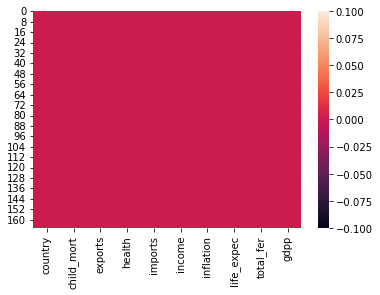

In [4]:
sns.heatmap(df.isna())

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


##### finding: no missing data

#### 1-4 DataFrame information & discription

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.describe().round()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0
mean,38.0,41.0,7.0,47.0,17145.0,8.0,71.0,3.0,12964.0
std,40.0,27.0,3.0,24.0,19278.0,11.0,9.0,2.0,18329.0
min,3.0,0.0,2.0,0.0,609.0,-4.0,32.0,1.0,231.0
25%,8.0,24.0,5.0,30.0,3355.0,2.0,65.0,2.0,1330.0
50%,19.0,35.0,6.0,43.0,9960.0,5.0,73.0,2.0,4660.0
75%,62.0,51.0,9.0,59.0,22800.0,11.0,77.0,4.0,14050.0
max,208.0,200.0,18.0,174.0,125000.0,104.0,83.0,7.0,105000.0


In [8]:
df.describe(include='O')

,country
count,167
unique,167
top,Afghanistan
freq,1


#### 1-5 Data visualization: histplot & boxplot

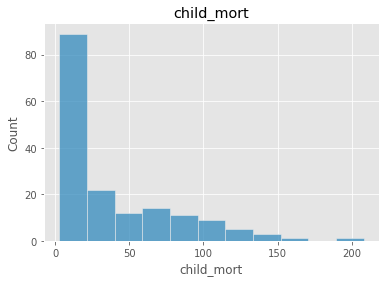

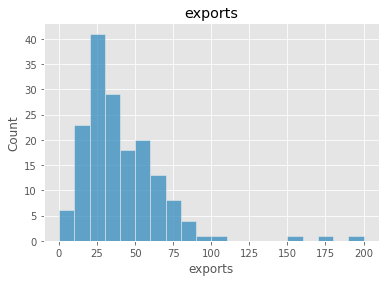

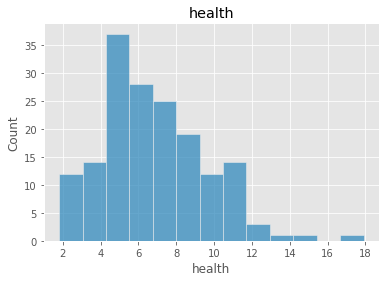

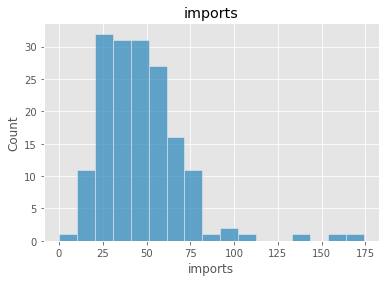

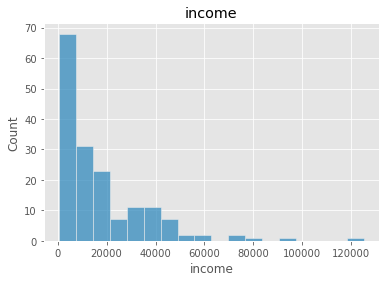

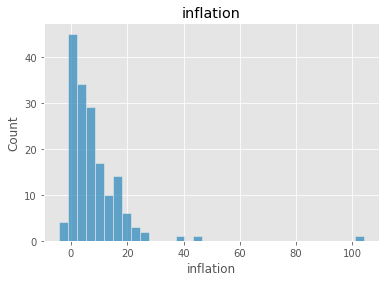

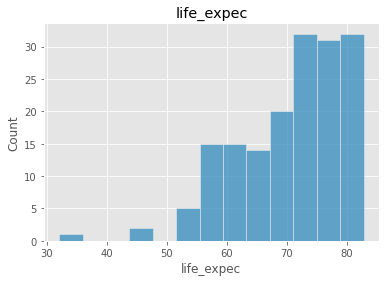

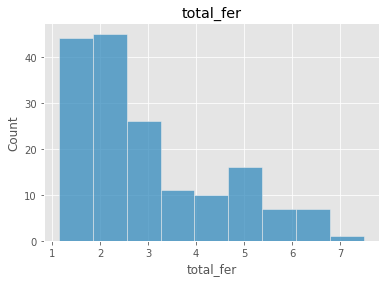

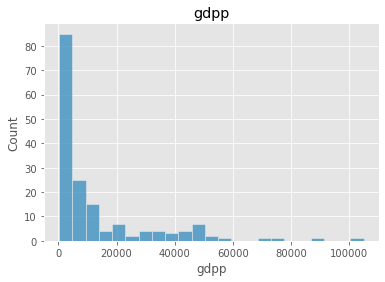

In [8]:
# distribution of each column: histplot
numeric = df.select_dtypes(include = 'number')
plt.style.use('ggplot')
for i in numeric.columns:
    sns.histplot(df[i])
    plt.title(i)
    plt.show()

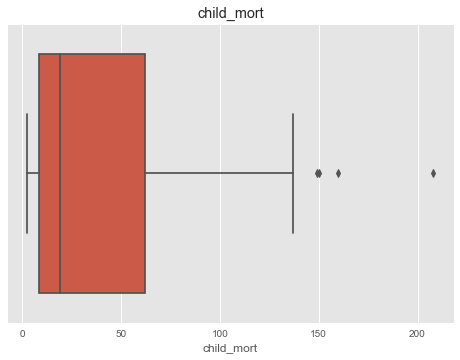

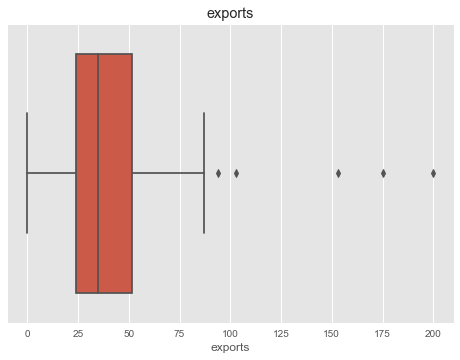

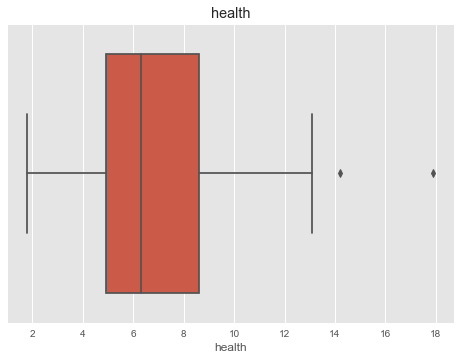

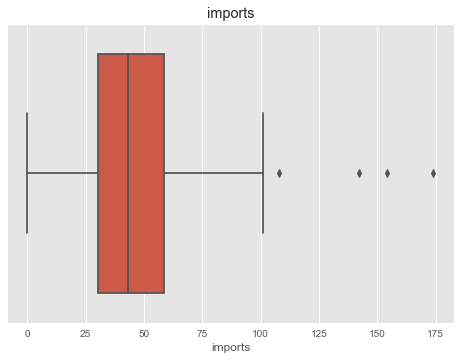

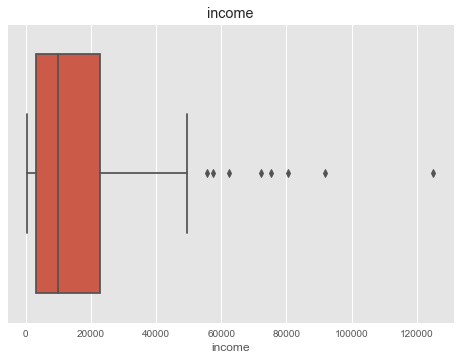

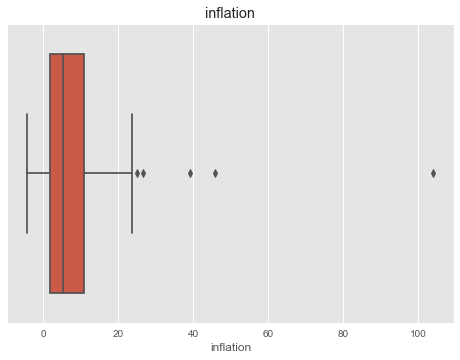

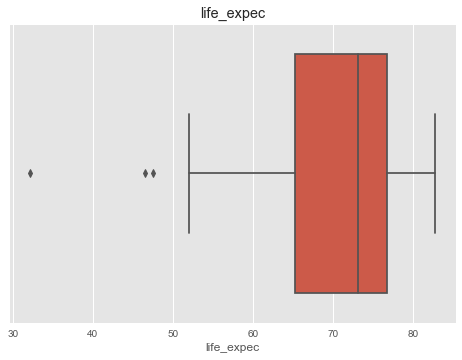

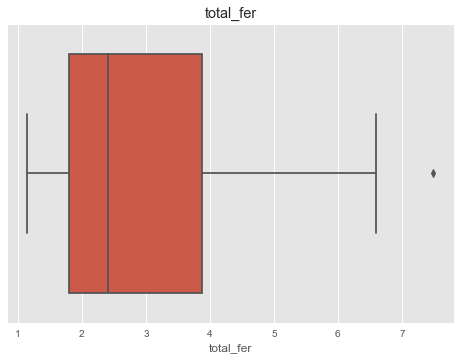

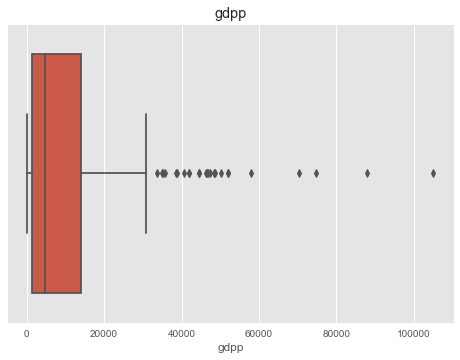

In [42]:
# distribution of each column: box plot
plt.style.use('ggplot')
for i in numeric.columns:
    sns.boxplot(x = numeric[i])
    plt.title(i)
    plt.show()

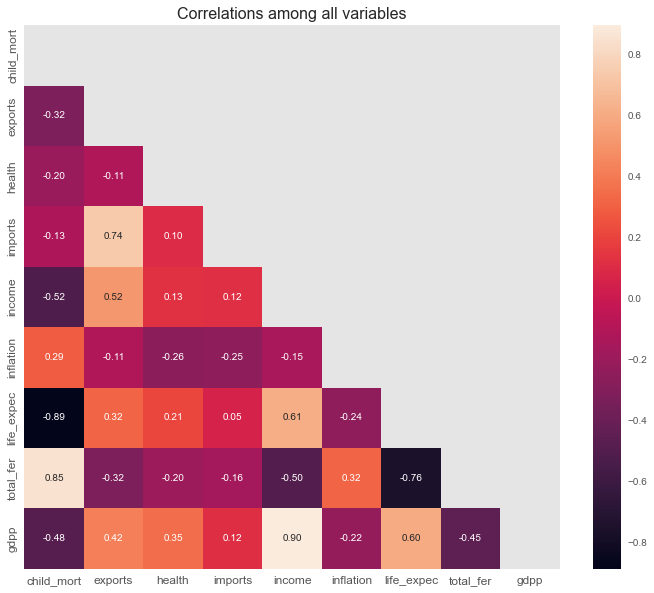

In [43]:
# correlations visualization
plt.figure(figsize = (12,10))
matrix = np.triu(numeric.corr())
sns.heatmap(numeric.corr(), annot=True,  mask=matrix, fmt = '.2f')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Correlations among all variables', fontsize = 16)
plt.show()

In [9]:
# correlated variables

matrix = numeric.corr().round(2)

ut = np.triu(matrix, k=1)
lt = np.tril(matrix, k=-1)

ut = np.where(ut==0, np.nan, ut)
lt = np.where(lt==0, np.nan, lt)

corr_table = pd.DataFrame(lt)
corr_table.columns = numeric.columns
corr_table.index = numeric.columns
corr_table[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']] = corr_table[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']].astype(float)
corr_table.fillna('-')


class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

corr_var = []
for i in corr_table.columns:
    for j in corr_table[i]:
        if j >=0.7 or j <= -0.7:
            index =  corr_table.loc[corr_table[i] == j].index[0]
            column =  i
            if index != column:
                corr_var.append((index, column))
                print(color.BOLD+ str(index) +color.END, 'and', color.BOLD+ column  +color.END, 'are correlated')
                print('r = ', round(j, 2))
                print("")

life_expec and child_mort are correlated
r =  -0.89

total_fer and child_mort are correlated
r =  0.85

imports and exports are correlated
r =  0.74

gdpp and income are correlated
r =  0.9

total_fer and life_expec are correlated
r =  -0.76



Comments:

Based on the distributions most of the variables are not normal distributed

and there are outliers in each variable. 

The standard scale is not a good method to scale the data

`MinMax` will be better because outliers play an import role in this analysis

The effect of outliers should not be deminished.

### 2 & 3 Scaling data & PCA

In [15]:
# import libraries

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
decomp = PCA()
pipe_min_max = make_pipeline(scaler, decomp)
pc_values_min_max = pipe_min_max.fit_transform(numeric)
pipe_min_max.fit(numeric)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA())])

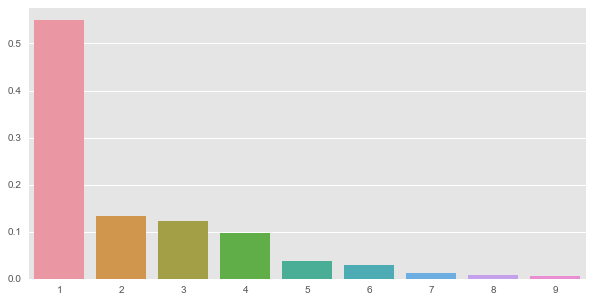

In [44]:
# visualization of the results

plt.style.use('ggplot')
index = [i+1 for i in range(9)]
plt.figure(figsize = (10,5))
sns.barplot(x = index, y = pipe_min_max['pca'].explained_variance_ratio_)
#plt.title('MinMaxScaler')
plt.show()

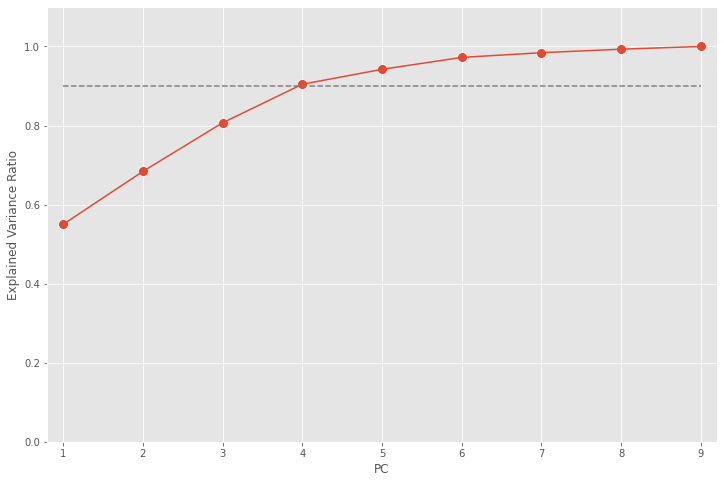

In [17]:
# based on the Scree plot the 'elbow' locates at 4

plt.style.use('ggplot')
explained_variance = pipe_min_max['pca'].explained_variance_ratio_.cumsum()
index = [i+1 for i in range(len(explained_variance))]

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=index, y=explained_variance)
sns.scatterplot(x=index, y=explained_variance, s=100)
plt.xlim((1-0.2, len(explained_variance)+0.2))
plt.ylim((0, 1.1))

x_s, x_e = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(x_s+0.2, x_e))
ax.hlines(y=0.9, xmin=1, xmax=len(explained_variance), color='gray', linestyle='--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('PC')
plt.show()

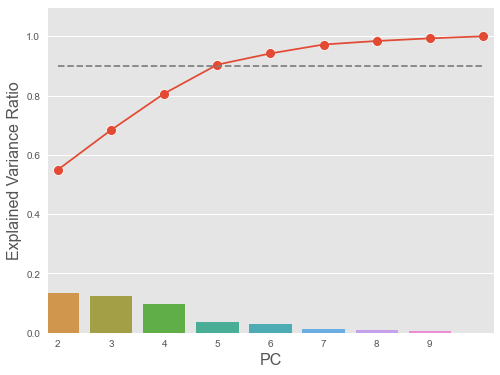

In [49]:
# combine 2 plots into 1

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,6))


index = [i+1 for i in range(9)]
sns.barplot(x = index, y = pipe_min_max['pca'].explained_variance_ratio_)
explained_variance = pipe_min_max['pca'].explained_variance_ratio_.cumsum()
index = [i+1 for i in range(len(explained_variance))]

sns.lineplot(x=index, y=explained_variance)
sns.scatterplot(x=index, y=explained_variance, s=100)
plt.xlim((1-0.2, len(explained_variance)+0.2))
plt.ylim((0, 1.1))



x_s, x_e = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(x_s+0.2, x_e))
ax.hlines(y=0.9, xmin=1, xmax=len(explained_variance), color='gray', linestyle='--')
plt.ylabel('Explained Variance Ratio', fontsize = 16)
plt.xlabel('PC', fontsize = 16)
plt.show()

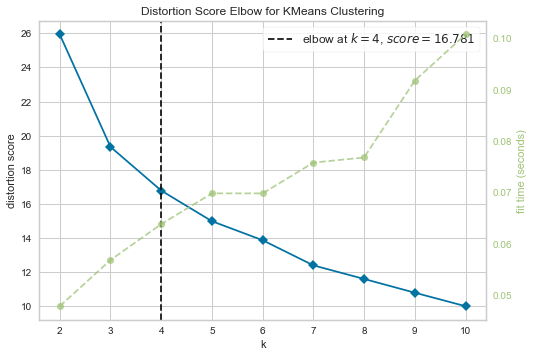

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

scaler = MinMaxScaler()
pipe = make_pipeline(scaler, KElbowVisualizer(KMeans()))
pipe.fit(numeric)
pipe[1].show()

#### Comment: Based on the plots PC4 and cluster 4  will be the best 

### 5. Clustering data 

In [19]:
# making pipeline to scaling, PCA and cluster data
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scaler = MinMaxScaler()                                # scaling data
decomp = PCA(n_components=0.9)                         # PCA
cluster = KMeans(n_clusters= 4)                        # cluster the data into 4 clusters
pipe_minmax = make_pipeline(scaler, decomp, cluster)   # making a pipeline to process the data

pipe_minmax.fit(numeric)                               # fit the data 

df['labels_minmax'] = pipe_minmax['kmeans'].labels_    # add the clustered labels in the DataFrame

pipe_minmax.fit_transform(numeric)                     # added the values after scaling and PCA in the DataFrame
df[['pc1_minmax', 'pc2_minmax', 'pc3_minmax', 'pc4_minmax']] = pipe_minmax.fit_transform(numeric) 

#### Visualization

In [ ]:
# If rerun the code again the order of the cluster will be different
# Therefor I save the dataframe and plot it
df.to_csv('clustered_df.csv')
df = pd.read_csv('clustered_df.csv') 

<AxesSubplot:xlabel='pc1_minmax', ylabel='pc2_minmax'>

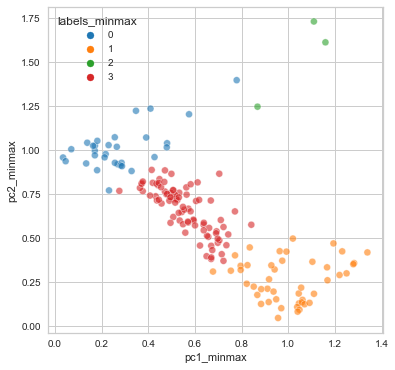

In [20]:
# Visualize the clustered data based on PC1 & PC2
sns.color_palette("tab10")
plt.figure(figsize = (6,6))
sns.scatterplot(data = df, x = 'pc1_minmax', y='pc2_minmax', hue = 'labels_minmax', palette="tab10", alpha = 0.6)#, legend=['a', 'b', 'c', 'd'])
#plt.legend(['a', 'b', 'c', 'd'])#title='Smoker', loc='upper left', labels=['Hell', 'Yeh'])

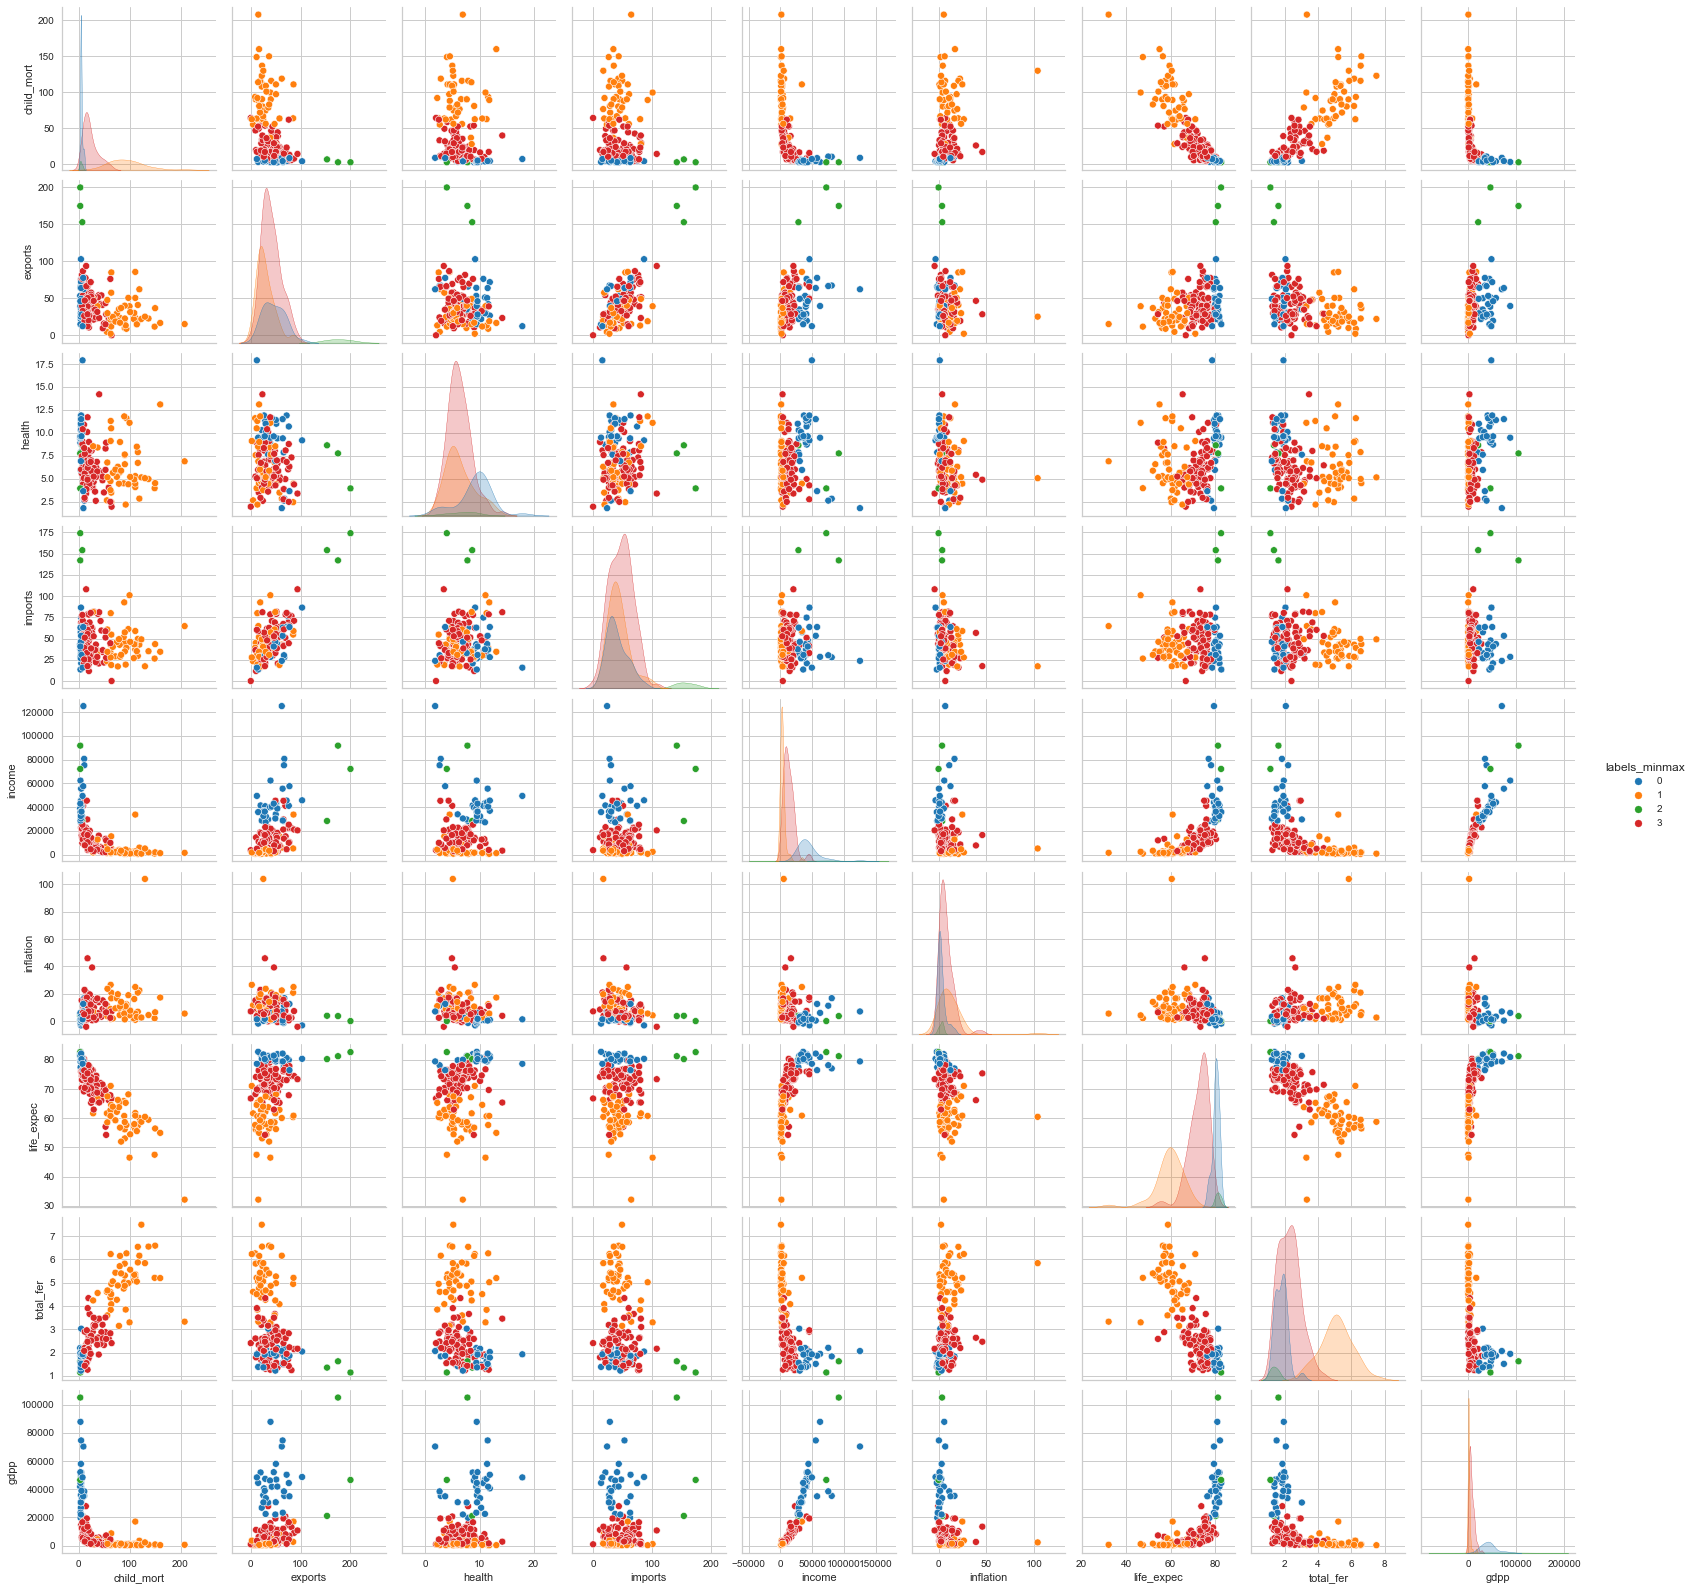

In [21]:
# pairplot
df_pairplot = df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp', 'labels_minmax']]
sns.pairplot(df_pairplot, hue = 'labels_minmax', palette="tab10")
plt.show()

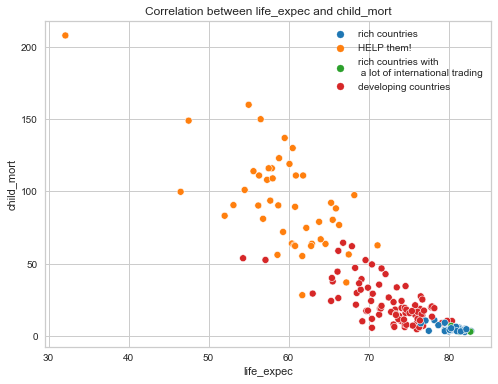

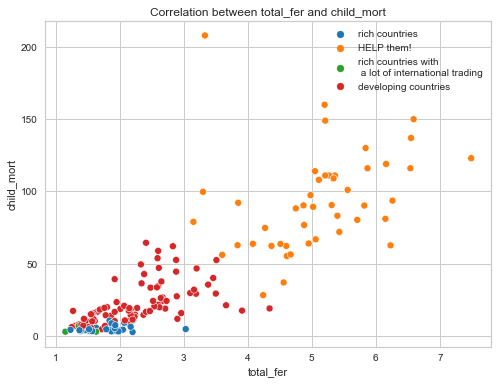

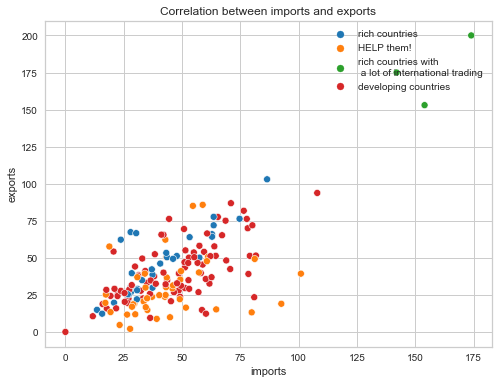

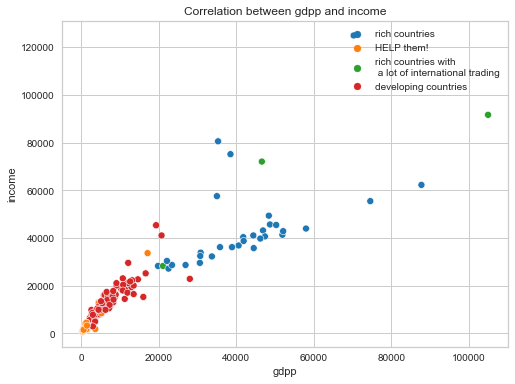

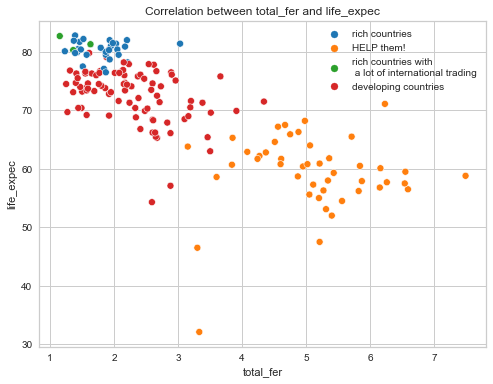

In [23]:
# visualization of correlations and differen clusters
labels = [ 'rich countries','HELP them!', 'rich countries with \n a lot of international trading','developing countries']
for i in corr_var:
    plt.figure(figsize = (8,6))
    ax = sns.scatterplot(data = df, x = i[0], y = i[1], hue = 'labels_minmax', palette="tab10", legend = labels)
    plt.legend(labels = labels)
    plt.title(f'Correlation between {i[0]} and {i[1]}')
    handles, labels  =  ax.get_legend_handles_labels()
    labels = [ 'rich countries','HELP them!', 'rich countries with \n a lot of international trading','developing countries']

    ax.legend(handles, labels, loc='upper right')
    plt.show()

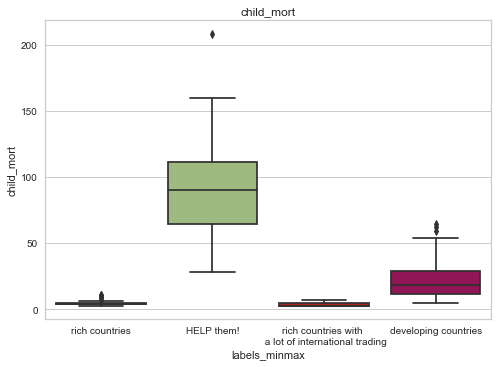

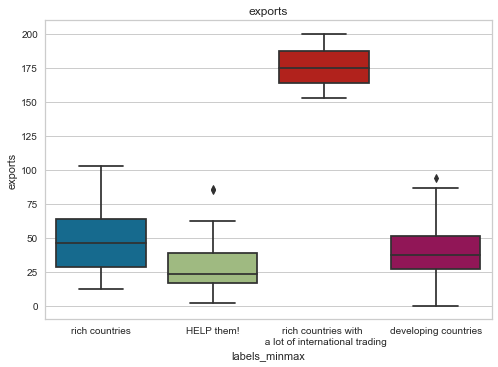

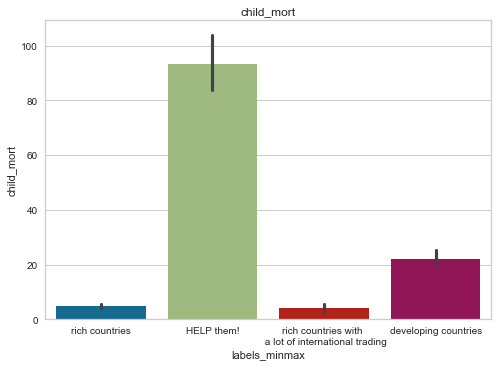

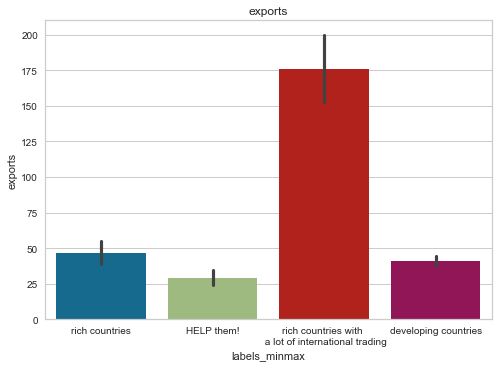

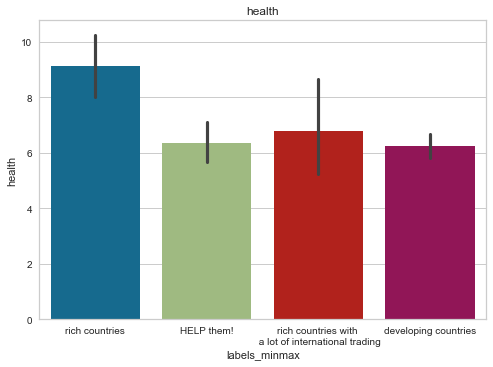

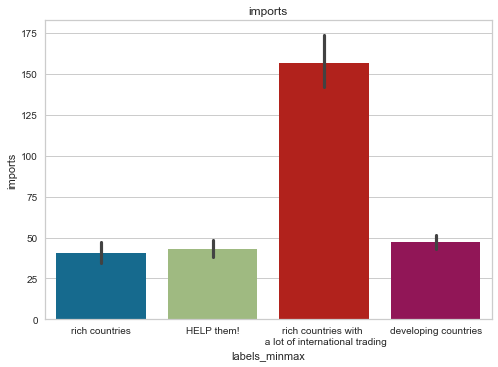

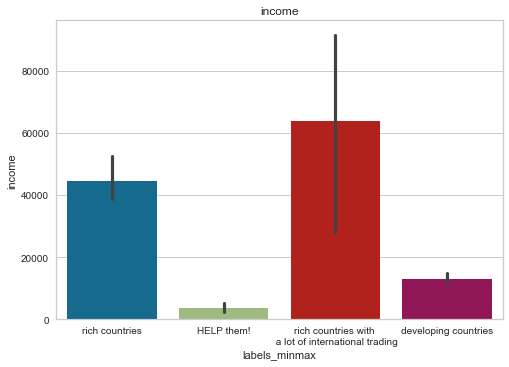

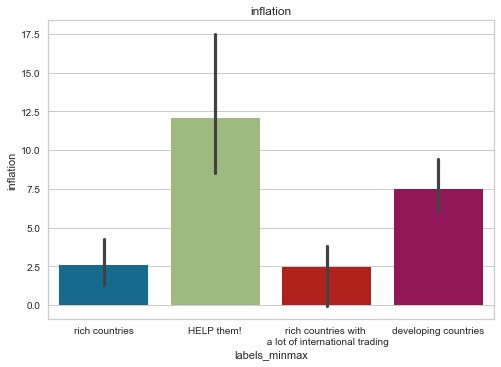

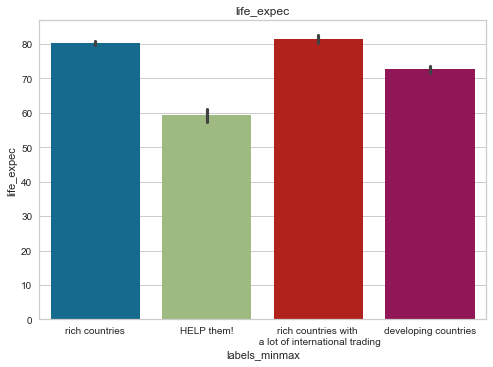

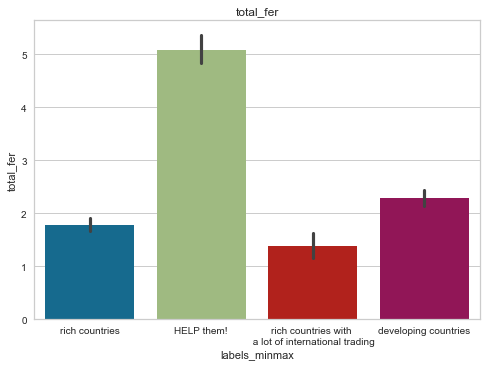

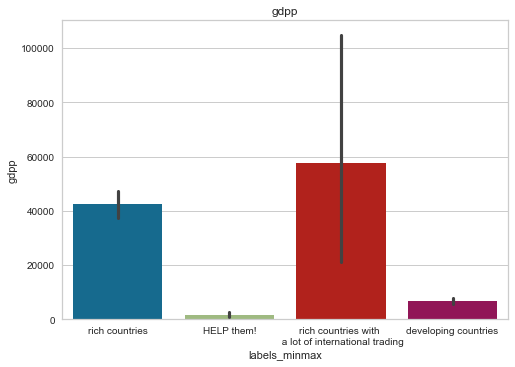

In [24]:
# visualization of variables in different clusters

variables = ['child_mort', 'exports']#, 'health', 'imports', 'income',
       #'inflation', 'life_expec', 'total_fer', 'gdpp']

for i in variables:
    sns.boxplot(data = df, x = 'labels_minmax', y =  i)
    plt.xticks(ticks = [0,1,2,3], labels = labels)
    plt.title(i)
    plt.show()

variables = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

for i in variables:
    sns.barplot(data = df, x = 'labels_minmax', y =  i)
    plt.xticks(ticks = [0,1,2,3], labels = labels)
    plt.title(i)
    plt.show()

In [32]:
overview = df.groupby('labels_minmax').country.count()
overview.index = labels
overview

rich countries                                           31
HELP them!                                               46
rich countries with \n a lot of international trading     3
developing countries                                     87
Name: country, dtype: int64

In [39]:
# countries who need help
need_help_countries = list(df.loc[df.labels_minmax == 1].country)
len(need_help_countries)

46

### 6. Suggestions

Countries need help are 46.

The list included: 
'Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia'
 
 These countries have: 
 
 Health related variables
 - (1) high child mortality, 
 - (2) low life expectancy
 - (3) high fertality 
 - (4) low life expectancy
 
Economy related variables
 - (5) low income,
 - (6) high inflation, 
 - (7) low GDP
